<a href="https://colab.research.google.com/github/adalves-ufabc/2022.Q2-PLN/blob/main/2022_Q2_PLN_Notebook_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2022.Q2]**
Prof. Alexandre Donizeti Alves

### **Sumarização Automática de Textos**

<img src='https://miro.medium.com/max/1064/1*GIVviyN9Q0cqObcy-q-juQ.png'>

In [1]:
# importando bibliotecas basicas
import re
import nltk
import string
import pandas as pd
import numpy as np

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
texto_original = """A grosso modo, Linguística Computacional é a intersecção entre Computação e Linguística. Sendo mais claro, por meio de processos computacionais, ou seja, da Linguística Computacional, é possível manipular a língua natural, seja o aspecto falado, seja o escrito.
A partir dessa manipulação, pode-se estudar aspectos gramaticais de uma língua, os padrões de um gênero textual, as peculiaridades de uma classe de palavra, além da geração de softwares capazes de decodificar e codificar uma língua natural. A contribuição é desde para a Linguística quanto para o avanço tecnológico.
Havendo essa relevância, o presente artigo demonstra o passo a passo de um possível uso da Linguística Computacional para o estudo linguístico.
Para a demonstração, selecionei o estudo de caso em que os objetos de estudo são as preposições in, on, at e within. O foco é compreender um pouco a respeito do aspecto semântico dessas preposições no decorrer de aproximadamente 200 anos. Ressalto que por se tratar de uma demonstração, não realizarei um trabalho rigoroso.
Para isso, selecionei o corpus inaugural, o qual contém os textos escritos de posse dos ex-presidentes estadunidenses. Deve-se considerar que os textos estão em um contexto de formalidade e foram escritos ao longo de mais ou menos 200 anos de história. Ao todo, o corpus apresenta 59 textos, número de presidentes da história estadunidense. A escolha foi justamente devido ambiente comum (posse de presidente) e a organização cronológica dos textos.
Como se trata de textos referentes à posse de presidentes estadunidenses, o período entre a realização e/ou publicação entre um texto e outro é de quatro anos.
Não trabalhei com todos os textos. Selecionarei apenas alguns, levando em consideração que as mudanças linguísticas significativas não são normalmente imediatas. Um espaço de tempo razoável para análise é a observância de textos com 20 anos de diferença de um para o outro.
Dos selecionados, tendo como filtro esse período de diferença, faço outra seleção, selecionando apenas três textos de tempos longínquos entre si. O ideal é pegar o primeiro texto produzido, o mediano e o último dentre os selecionados pelo primeiro filtro. Essa distância pode evidenciar a mudança semântica das preposições.
A partir dos textos selecionados por meio do primeiro filtro, gero gráficos, e, através dos três textos selecionados através do segundo filtro, estudo as preposições em contextos.
"""

In [ ]:
texto_original

'A grosso modo, Linguística Computacional é a intersecção entre Computação e Linguística. Sendo mais claro, por meio de processos computacionais, ou seja, da Linguística Computacional, é possível manipular a língua natural, seja o aspecto falado, seja o escrito.\nA partir dessa manipulação, pode-se estudar aspectos gramaticais de uma língua, os padrões de um gênero textual, as peculiaridades de uma classe de palavra, além da geração de softwares capazes de decodificar e codificar uma língua natural. A contribuição é desde para a Linguística quanto para o avanço tecnológico.\nHavendo essa relevância, o presente artigo demonstra o passo a passo de um possível uso da Linguística Computacional para o estudo linguístico.\nPara a demonstração, selecionei o estudo de caso em que os objetos de estudo são as preposições in, on, at e within. O foco é compreender um pouco a respeito do aspecto semântico dessas preposições no decorrer de aproximadamente 200 anos. Ressalto que por se tratar de uma 

In [ ]:
# retirando símbolo de quebra de linha
texto_original = re.sub(r'\n', '', texto_original)

In [ ]:
# resultado
texto_original

'A grosso modo, Linguística Computacional é a intersecção entre Computação e Linguística. Sendo mais claro, por meio de processos computacionais, ou seja, da Linguística Computacional, é possível manipular a língua natural, seja o aspecto falado, seja o escrito.A partir dessa manipulação, pode-se estudar aspectos gramaticais de uma língua, os padrões de um gênero textual, as peculiaridades de uma classe de palavra, além da geração de softwares capazes de decodificar e codificar uma língua natural. A contribuição é desde para a Linguística quanto para o avanço tecnológico.Havendo essa relevância, o presente artigo demonstra o passo a passo de um possível uso da Linguística Computacional para o estudo linguístico.Para a demonstração, selecionei o estudo de caso em que os objetos de estudo são as preposições in, on, at e within. O foco é compreender um pouco a respeito do aspecto semântico dessas preposições no decorrer de aproximadamente 200 anos. Ressalto que por se tratar de uma demons

In [ ]:
# stop words
stopwords = nltk.corpus.stopwords.words('portuguese')

print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [ ]:
pontuacoes = string.punctuation

print(pontuacoes)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
def pre_processamento(texto):
    texto_formatado = texto.lower()
    tokens = []
    texto_limpo = []
    for token in nltk.word_tokenize(texto_formatado):
        tokens.append(token)
    
    for token in tokens:
        if token not in stopwords and token not in pontuacoes:
            texto_limpo.append(token)
    
    texto_limpo_unificado = ' '.join([str(elemento) for elemento in texto_limpo])
    
    return texto_limpo_unificado

In [ ]:
# testando a função
teste = "JOAO é Muito DoIDo, Dá até GosTo de VER. ) ( ."

pre_processamento(teste)

'joao doido dá gosto ver'

In [ ]:
# limpando o texto original
texto_limpo = pre_processamento(texto_original)

print(texto_limpo)

grosso modo linguística computacional intersecção computação linguística sendo claro meio processos computacionais linguística computacional possível manipular língua natural aspecto falado escrito.a partir dessa manipulação pode-se estudar aspectos gramaticais língua padrões gênero textual peculiaridades classe palavra além geração softwares capazes decodificar codificar língua natural contribuição desde linguística quanto avanço tecnológico.havendo relevância presente artigo demonstra passo passo possível uso linguística computacional estudo linguístico.para demonstração selecionei estudo caso objetos estudo preposições in on at within foco compreender pouco respeito aspecto semântico dessas preposições decorrer aproximadamente 200 anos ressalto tratar demonstração realizarei trabalho rigoroso.para selecionei corpus inaugural contém textos escritos posse ex-presidentes estadunidenses deve-se considerar textos contexto formalidade escritos longo menos 200 anos história todo corpus apr

A lógica de funcionalidade do modelo baseia-se nos pesos de relevância das sentenças. Esses pesos são gerados a partir do peso de cada palavra que não é uma palavra-chave. Portanto, os pesos das palavras compõem os pesos das sentenças.

In [ ]:
freq_palavras = nltk.FreqDist(nltk.word_tokenize(texto_limpo))

freq_palavras

FreqDist({'textos': 9, 'linguística': 5, 'estudo': 4, 'selecionados': 4, 'filtro': 4, 'computacional': 3, 'língua': 3, 'preposições': 3, 'anos': 3, 'posse': 3, ...})

In [ ]:
# frequencia maxima
frq_max = max(freq_palavras.values())

frq_max

9

Os pesos das palavras são gerados pelo seguinte cálculo:

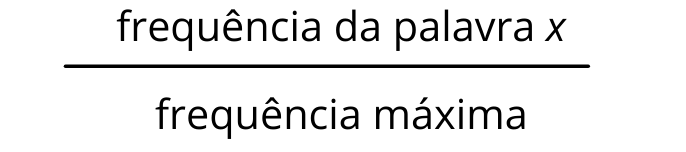

In [ ]:
# calculando o peso das palavras
for palavra in freq_palavras.keys():
    freq_palavras[palavra] = (freq_palavras[palavra]/frq_max)

In [ ]:
# pesos das palavras
freq_palavras

FreqDist({'textos': 1.0, 'linguística': 0.5555555555555556, 'estudo': 0.4444444444444444, 'selecionados': 0.4444444444444444, 'filtro': 0.4444444444444444, 'computacional': 0.3333333333333333, 'língua': 0.3333333333333333, 'preposições': 0.3333333333333333, 'anos': 0.3333333333333333, 'posse': 0.3333333333333333, ...})

In [ ]:
# tokenização de sentenças
sent_tkn =  nltk.sent_tokenize(texto_original)

sent_tkn

['A grosso modo, Linguística Computacional é a intersecção entre Computação e Linguística.',
 'Sendo mais claro, por meio de processos computacionais, ou seja, da Linguística Computacional, é possível manipular a língua natural, seja o aspecto falado, seja o escrito.A partir dessa manipulação, pode-se estudar aspectos gramaticais de uma língua, os padrões de um gênero textual, as peculiaridades de uma classe de palavra, além da geração de softwares capazes de decodificar e codificar uma língua natural.',
 'A contribuição é desde para a Linguística quanto para o avanço tecnológico.Havendo essa relevância, o presente artigo demonstra o passo a passo de um possível uso da Linguística Computacional para o estudo linguístico.Para a demonstração, selecionei o estudo de caso em que os objetos de estudo são as preposições in, on, at e within.',
 'O foco é compreender um pouco a respeito do aspecto semântico dessas preposições no decorrer de aproximadamente 200 anos.',
 'Ressalto que por se tra

In [ ]:
# contabilização dos pesos das sentenças
pesos_sentencas = {}
for sentenca in sent_tkn:
    for palavra in sentenca.lower().split():
        if palavra in freq_palavras.keys():
            if sentenca not in pesos_sentencas.keys():
                pesos_sentencas[sentenca]= freq_palavras[palavra]
            else:
                pesos_sentencas[sentenca] += freq_palavras[palavra]

In [ ]:
# criando dataframe com as sentenças e seus respectivos pesos
df = pd.DataFrame({'sentenca':pesos_sentencas.keys(),
                  'nota':pesos_sentencas.values()},
                  index=range(len(pesos_sentencas))).sort_values('nota', ascending=False)
             
df.index = range(len(df.sentenca))
df

,sentenca,nota
0,Essa distância pode evidenciar a mudança semân...,6.000000
1,A contribuição é desde para a Linguística quan...,5.444444
2,Um espaço de tempo razoável para análise é a o...,5.111111
3,"Sendo mais claro, por meio de processos comput...",4.222222
4,A escolha foi justamente devido ambiente comum...,4.000000
5,Ressalto que por se tratar de uma demonstração...,2.777778
6,Deve-se considerar que os textos estão em um c...,2.444444
7,"O ideal é pegar o primeiro texto produzido, o ...",1.888889
8,O foco é compreender um pouco a respeito do as...,1.666667
9,"A grosso modo, Linguística Computacional é a i...",1.222222


In [ ]:
# importando biblioteca para seleção de sentencas
import heapq

# selecionando as três sentenças com maior peso
melhores_sents = heapq.nlargest(3, pesos_sentencas, key=pesos_sentencas.get)

In [ ]:
# juntando as sentenças
' '.join(melhores_sents)

'Essa distância pode evidenciar a mudança semântica das preposições.A partir dos textos selecionados por meio do primeiro filtro, gero gráficos, e, através dos três textos selecionados através do segundo filtro, estudo as preposições em contextos. A contribuição é desde para a Linguística quanto para o avanço tecnológico.Havendo essa relevância, o presente artigo demonstra o passo a passo de um possível uso da Linguística Computacional para o estudo linguístico.Para a demonstração, selecionei o estudo de caso em que os objetos de estudo são as preposições in, on, at e within. Um espaço de tempo razoável para análise é a observância de textos com 20 anos de diferença de um para o outro.Dos selecionados, tendo como filtro esse período de diferença, faço outra seleção, selecionando apenas três textos de tempos longínquos entre si.'

In [46]:
# importando módulo HTML
from IPython.core.display import display, HTML

display(HTML(f'<h1>Resumo do Texto</h1>'))

texto = ''
for sent in sent_tkn:
    if sent in melhores_sents:
        texto += str(sent).replace(sent, f"<mark style='background-color: yellow'>{sent}</mark>")
    else:
        texto += sent

display(HTML(f"""{texto}"""))

**Mais informações em:**

> https://br-cienciadedados.medium.com/sumariza%C3%A7%C3%A3o-autom%C3%A1tica-de-texto-9f48223b2e83